# Example 1:  Linear Regression: Air Pollution and Mortality
##  Step 1: Read the data  
### data1 <- read.table("http://www2.isye.gatech.edu/~ymei/7406/Handouts/mortality1.txt",header=T)


## A. Read data from a text file online given a URL


In [347]:
import urllib.request # the lib that handles the url stuff
targetURL = "http://www2.isye.gatech.edu/~ymei/7406/Handouts/mortality1.txt"
data = urllib.request.urlopen(targetURL) # it's a file like object and works just like a file

DATA=[]
for idx, line in enumerate(urllib.request.urlopen(targetURL)):
    #for the headline
    if idx == 0:
        print(line)#b'Prec Educ NW NOX SO2 Mort CITY\r\n'
        new_line = line.decode("utf-8") #decode the bytes object to produce a string
        print(new_line)
        new_line = new_line.rstrip('\r\n') #remove \r\n
        print(new_line)
        header_names = new_line.split(' ')
        print (header_names)
    #for the rest lines    
    else:
        new_line = line.decode("utf-8")
        new_line = new_line.lstrip(' ')
        new_line = new_line.rstrip('\r\n')
        data = new_line.split()
        
    DATA.append(data) #all data without header

b'Prec Educ NW NOX SO2 Mort CITY\r\n'
Prec Educ NW NOX SO2 Mort CITY

Prec Educ NW NOX SO2 Mort CITY
['Prec', 'Educ', 'NW', 'NOX', 'SO2', 'Mort', 'CITY']


In [349]:
data_online = pd.DataFrame(DATA[1:],columns=header_names) #construct the dataframe, DataFrame is widely used for 2D data analysis

In [350]:
data_online.head()

,Prec,Educ,NW,NOX,SO2,Mort,CITY
0,36,11.4,8.8,15,59,921.870,akr
1,35,11.0,3.5,10,39,997.875,alb
2,44,9.8,0.8,6,33,962.354,all
3,47,11.1,27.1,8,24,982.291,atl
4,43,9.6,24.4,38,206,1071.289,blt


## B. Read txt file from local address

In [80]:
import pandas as pd
import re   #Regular expression operations
#re.split is very powerful for split strings and values....  re.split(r'(?:,|;|\s)\s*', line),re.split(r'(;|,|\s)\s*', line)  
data_local = pd.read_csv('C:/Users/tianh/Dropbox (GaTech)/7406 Python code/mortality1.txt', sep = (r'(?:,|;|\s)\s*'), header =0) #pay attention to the split criteria
data_local.head()

C:\Users\tianh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Prec,Educ,NW,NOX,SO2,Mort,CITY
0,36,11.4,8.8,15,59,921.870,akr
1,35,11.0,3.5,10,39,997.875,alb
2,44,9.8,0.8,6,33,962.354,all
3,47,11.1,27.1,8,24,982.291,atl
4,43,9.6,24.4,38,206,1071.289,blt


In [81]:
data_local.iloc[:,:6].head() 

,Prec,Educ,NW,NOX,SO2,Mort
0,36,11.4,8.8,15,59,921.870
1,35,11.0,3.5,10,39,997.875
2,44,9.8,0.8,6,33,962.354
3,47,11.1,27.1,8,24,982.291
4,43,9.6,24.4,38,206,1071.289


In [82]:
data_local['NW'].head()

0     8.8
1     3.5
2     0.8
3    27.1
4    24.4
Name: NW, dtype: float64

In [83]:
type(data_local)

pandas.core.frame.DataFrame

## Regression in Python using R-style formula
http://blog.rtwilson.com/regression-in-python-using-r-style-formula-its-easy/

In [84]:
from statsmodels.formula.api import ols

In [85]:
df = data_local.iloc[:,:6]
df.columns

Index(['Prec', 'Educ', 'NW', 'NOX', 'SO2', 'Mort'], dtype='object')

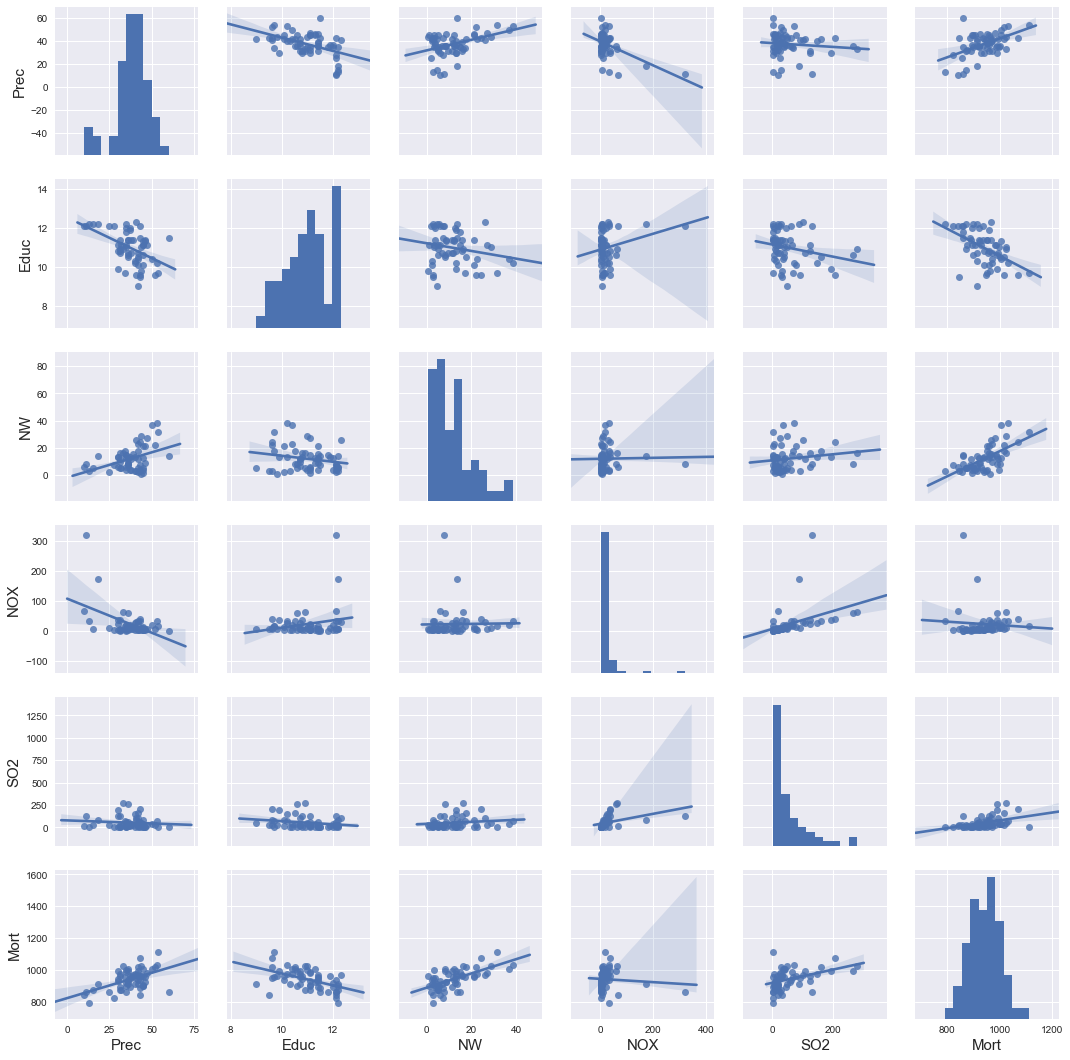

In [87]:
# library 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(data_local, kind="reg")
plt.show()

In [8]:
df.corr() #

,Prec,Educ,NW,NOX,SO2,Mort
Prec,1.000000,-0.490425,0.413204,-0.487321,-0.106924,0.509492
Educ,-0.490425,1.000000,-0.208774,0.224402,-0.234346,-0.510981
NW,0.413204,-0.208774,1.000000,0.018385,0.159293,0.643736
NOX,-0.487321,0.224402,0.018385,1.000000,0.409394,-0.077381
SO2,-0.106924,-0.234346,0.159293,0.409394,1.000000,0.425947
Mort,0.509492,-0.510981,0.643736,-0.077381,0.425947,1.000000


#  2. Linear Regression 
##  First-order model on Prec, Educ, NW

In [252]:
model =ols('Mort ~ Prec + Educ + NW', data = df)

In [253]:
results = model.fit()

In [254]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mort   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     25.10
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           2.02e-10
Time:                        20:23:56   Log-Likelihood:                -306.89
No. Observations:                  60   AIC:                             621.8
Df Residuals:                      56   BIC:                             630.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1141.7319     94.659     12.062      0.000     952.108    1331.356
Prec           0.7981      0.670      1.191      0.239      -0.544       2.140
Educ         -24.9902      7.369     -3.391      0.001     -39.752     -10.228
NW             3.6249      0.668      5.425      0.000       2.286       4.964
==============================================================================
Omnibus:                        0.493   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.428
Skew:                          -0.198   Prob(JB):                        0.807
Kurtosis:                       2.878   Cond. No.                         741.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## What if we want to add interaction terms?

In [255]:
model_int =ols('Mort ~ Prec * Educ * NW', data =df)

In [256]:
results_int = model_int.fit()
results_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mort   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     13.95
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           5.10e-10
Time:                        20:24:54   Log-Likelihood:                -300.74
No. Observations:                  60   AIC:                             617.5
Df Residuals:                      52   BIC:                             634.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2469.9422    737.264      3.350      0.002     990.513    3949.371
Prec           -36.6203     17.630     -2.077      0.043     -71.997      -1.243
Educ          -144.5179     62.037     -2.330      0.024    -269.004     -20.031
Prec:Educ        3.3889      1.493      2.270      0.027       0.394       6.384
NW             -69.9560     48.535     -1.441      0.155    -167.348      27.436
Prec:NW          2.1139      1.084      1.950      0.057      -0.062       4.290
Educ:NW          7.1046      4.272      1.663      0.102      -1.468      15.677
Prec:Educ:NW    -0.2034      0.097     -2.105      0.040      -0.397      -0.010
==============================================================================
Omnibus:                        0.514   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.652
Skew:                          -0.105   Prob(JB):                        0.722
Kurtosis:                       2.535   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## How about the Second-order models? There are two ways. 
## First, the most natural way
fm1c <- lm( Mort ~ Prec +I(Prec^2) + Educ + I(Educ^2) + NW + I(NW^2) + I(Prec*Educ) + I(Prec*NW) + I(Educ*NW), data = data1)
summary(fm1c)


In [260]:
model_2nd =ols('Mort ~ Prec  + I(Prec**2) + Educ + I(Educ**2) + NW + I(NW**2) + I(Prec*Educ) + I(Prec*NW) + I(Educ*NW)', data =df)
## don not use ^2, use **2 instead

In [262]:
results_2nd = model_2nd.fit()
results_2nd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mort   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     10.68
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           5.12e-09
Time:                        20:28:41   Log-Likelihood:                -300.29
No. Observations:                  60   AIC:                             620.6
Df Residuals:                      50   BIC:                             641.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -898.6840   1339.517     -0.671      0.505   -3589.182    1791.814
Prec              18.6602     16.070      1.161      0.251     -13.618      50.938
I(Prec ** 2)      -0.0981      0.052     -1.871      0.067      -0.203       0.007
Educ             269.3942    206.853      1.302      0.199    -146.082     684.871
I(Educ ** 2)     -11.1529      8.371     -1.332      0.189     -27.966       5.660
NW                22.5194     13.294      1.694      0.097      -4.183      49.222
I(NW ** 2)        -0.0264      0.083     -0.318      0.752      -0.194       0.141
I(Prec * Educ)    -0.9058      1.202     -0.754      0.455      -3.320       1.508
I(Prec * NW)      -0.0888      0.153     -0.579      0.565      -0.397       0.219
I(Educ * NW)      -1.3062      0.931     -1.404      0.167      -3.175       0.563
==============================================================================
Omnibus:                        0.319   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.500
Skew:                          -0.087   Prob(JB):                        0.779
Kurtosis:                       2.588   Cond. No.                     4.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [538]:
y_preds_fmlc = results_2nd.predict() 
y_preds_fmlc

array([ 932.76760239,  916.62762842,  915.35811905,  989.96778368,
       1041.2686523 , 1046.10774308,  887.53907379,  936.71516904,
        946.21852402,  937.23355224, 1018.45894644,  975.93545293,
        977.51526661,  964.92603774,  928.79512392,  939.40878452,
        946.70561859,  844.08073485,  973.61178089,  958.66529895,
        939.59646163,  918.22695048, 1016.21568699,  922.51111621,
        961.45001442,  957.28555652,  923.3643604 ,  922.94809942,
        844.05541148,  963.84702247, 1042.7248535 ,  890.17573072,
        917.46587258,  868.12790439, 1014.07308282,  931.51781185,
       1044.72417437,  961.49974638,  992.21370695,  945.30623593,
        894.39369859,  923.04605936,  920.14563204, 1007.55125977,
        917.56354077,  996.98434557,  828.72677228,  896.43313365,
        826.30843802,  892.98423741,  919.34986637,  913.74137426,
        943.25718063,  922.67778347,  925.94763694,  896.96549088,
        943.4011596 ,  909.96919824,  923.8543185 ,  962.86818

### Prediction on different prec and other X values are mean values##

In [280]:
mean1 = np.mean(data_local.iloc[:, :5])
mean1

Prec    37.366667
Educ    10.973333
NW      11.870000
NOX     22.650000
SO2     53.766667
dtype: float64

In [365]:
Xnew_value =[np.linspace(10,60,11), np.repeat(10.97333,11), np.repeat(11.87,11),np.repeat(22.65,11),np.repeat(53.76667,11)] #shape (5,11)
Xnew_value = np.array(Xnew_value).T.tolist() # transpose the list
columns = ['Prec', 'Educ', 'NW', 'NOX', 'SO2']

Xnew =  pd.DataFrame(Xnew_value,columns=columns )
Xnew

,Prec,Educ,NW,NOX,SO2
0,10.0,10.97333,11.87,22.65,53.76667
1,15.0,10.97333,11.87,22.65,53.76667
2,20.0,10.97333,11.87,22.65,53.76667
3,25.0,10.97333,11.87,22.65,53.76667
4,30.0,10.97333,11.87,22.65,53.76667
5,35.0,10.97333,11.87,22.65,53.76667
6,40.0,10.97333,11.87,22.65,53.76667
7,45.0,10.97333,11.87,22.65,53.76667
8,50.0,10.97333,11.87,22.65,53.76667
9,55.0,10.97333,11.87,22.65,53.76667


In [532]:
# predict(fm1c, xnew, interval="prediction", level=0.95)

In [386]:
# prediction
predicted = results_2nd.predict(Xnew)
predicted

0     874.794348
1     900.858408
2     922.016056
3     938.267293
4     949.612117
5     956.050530
6     957.582532
7     954.208121
8     945.927299
9     932.740065
10    914.646420
dtype: float64

In [539]:
prediction = results_2nd.get_prediction(Xnew)
prediction.summary_frame() #prediction with confidentce interval, with defailt level 0.95, 
#or you can set  confdeint level byv lpha=0.05 like follows:
y_preds= prediction.summary_frame(alpha=0.05)
y_preds 
#https://www.statsmodels.org/dev/_modules/statsmodels/regression/_prediction.html

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,874.794348,46.139239,782.120960,967.467736,752.761834,996.826862
1,900.858408,32.703677,835.171140,966.545676,797.812813,1003.904004
2,922.016056,22.040944,877.745517,966.286596,831.112490,1012.919622
3,938.267293,14.332317,909.479986,967.054599,853.814426,1022.720159
4,949.612117,9.868884,929.789881,969.434354,867.779980,1031.444255
5,956.050530,8.487075,939.003738,973.097323,874.846031,1037.255030
6,957.582532,8.992834,939.519892,975.645171,876.158724,1039.006340
7,954.208121,10.803990,932.507668,975.908575,871.900848,1036.515395
8,945.927299,14.617310,916.567567,975.287031,861.277601,1030.576998
9,932.740065,21.142850,890.273402,975.206729,842.701212,1022.778919


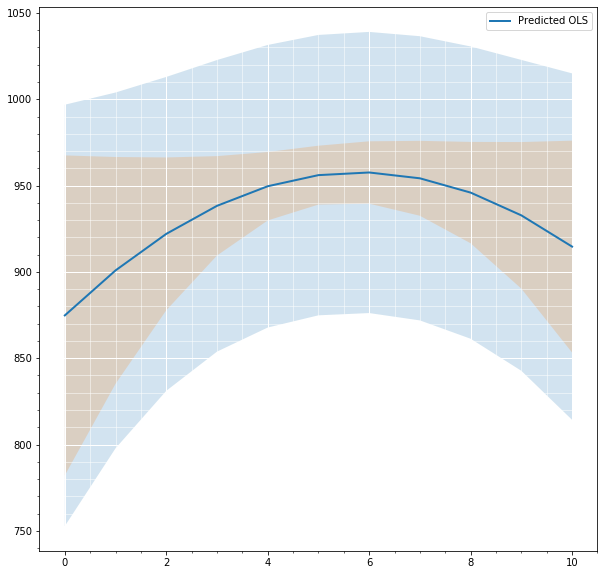

In [533]:
#visualizetion 

import matplotlib.pyplot as plt
import matplotlib as mpl

pi_low = pred_df['obs_ci_lower'] 
pi_upp = pred_df['obs_ci_upper']
ci_low = pred_df['mean_ci_lower'] 
ci_upp = pred_df['mean_ci_upper']

plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
# ax.plot(range(11),Xnew['Prec'], 'o', label = "True: Prec") #unknow true y value
ax.plot(range(11), predicted, '-', lw=2, label = "Predicted OLS")

ax.fill_between(np.arange(11), pi_low, pi_upp, alpha=0.2)
ax.fill_between(np.arange(11), ci_low, ci_upp, alpha=0.2)
ax.legend(loc='best');
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

plt.show()

## second, use the orthogonal plynomials 
fm1d <- lm(Mort ~ poly(Prec, Educ, NW, degree =2), data = data1)

summary(fm1d)

In [513]:
from sklearn.preprocessing import PolynomialFeatures
# pass the order of your polynomial here  
poly = PolynomialFeatures(2)
# convert to be used further to linear regression
Xpoly = data_local[['Prec', 'Educ', 'NW']] #note that there are 2 []s.
Xnewpl = poly.fit_transform(Xpoly) #numpy.ndarray
y = data_local['Mort']

### Then, you can do the Linear regression either by Stats Models, or SKLearn
### A. SKLearn for Linear Regression

In [527]:
#### One way to do LR using LinearRegression
from sklearn.linear_model import LinearRegression
# create a Linear Regressor   
lin_regressor = LinearRegression()
# fit this to Linear Regressor
lin_regressor.fit(Xnewpl, y) 
print(lin_regressor.intercept_)
print(lin_regressor.coef_)

# get the predictions
y_preds_fmldA = lin_regressor.predict(Xnewpl)
# y_preds

-898.6839841142804
[ 0.00000000e+00  1.86602498e+01  2.69394202e+02  2.25194288e+01
 -9.81282343e-02 -9.05849506e-01 -8.87991957e-02 -1.11529156e+01
 -1.30617060e+00 -2.64453653e-02]


After you fit the model, unlike with statsmodels, SKLearn does not automatically print the concepts or have a method like summary. So we have to print the coefficients separately. While SKLearn isn’t as intuitive for printing/finding coefficients, it’s much easier to use for cross-validation and plotting models. With a data set this small, these things may not be that necessary, but with most things you’ll be working with in the real world, these are essential steps.
### B. Stats Models for Linear Regression (R-like)

Unlike SKLearn, statsmodels doesn’t automatically fit a constant, so you need to use the method sm.add_constant(X) in order to add a constant. Adding a constant, while not necessary, makes your line fit much better. Once we add a constant (or an intercept if you’re thinking in line terms), you’ll see that the coefficients are the same in SKLearn and statsmodels.


In [515]:
import statsmodels.api as sm
X = sm.add_constant(Xnewpl) #add a constant manually

#note the swap of X and y
model = sm.OLS(y, X).fit()

#statsmodel gives R-like statistical  output
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mort   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     10.68
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           5.12e-09
Time:                        02:57:37   Log-Likelihood:                -300.29
No. Observations:                  60   AIC:                             620.6
Df Residuals:                      50   BIC:                             641.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -898.6840   1339.517     -0.671      0.505   -3589.182    1791.814
x1            18.6602     16.070      1.161      0.251     -13.618      50.938
x2           269.3942    206.853      1.302      0.199    -146.082     684.871
x3            22.5194     13.294      1.694      0.097      -4.183      49.222
x4            -0.0981      0.052     -1.871      0.067      -0.203       0.007
x5            -0.9058      1.202     -0.754      0.455      -3.320       1.508
x6            -0.0888      0.153     -0.579      0.565      -0.397       0.219
x7           -11.1529      8.371     -1.332      0.189     -27.966       5.660
x8            -1.3062      0.931     -1.404      0.167      -3.175       0.563
x9            -0.0264      0.083     -0.318      0.752      -0.194       0.141
==============================================================================
Omnibus:                        0.319   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.500
Skew:                          -0.087   Prob(JB):                        0.779
Kurtosis:                       2.588   Cond. No.                     4.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [529]:
y_pred_fmldB = model.predict(X)
y_pred_fmldB[:10]

array([ 932.76760239,  916.62762842,  915.35811905,  989.96778368,
       1041.2686523 , 1046.10774308,  887.53907379,  936.71516904,
        946.21852402,  937.23355224])

### comparison of SKlearn and Statsmodels
While coefficients are great, you can get them pretty easily from SKLearn, so the main benefit of statsmodels is the other statistics it provides. One of the assumptions of a simple linear regression model is normality of our data.  the statistics in the last table are testing the normality of our data. If the Prob(Omnibus) is very small, and I took this to mean <.05 as this is standard statistical practice, then our data is probably not normal. This is a more precise way than graphing our data to determine if our data is normal.


Statsmodels also helps us determine which of our variables are statistically significant through the p-values. If our p-value is <.05, then that variable is statistically significant. This is a useful tool to tune your model. 



Since SKLearn has more useful features, I would use it to build your final model, but statsmodels is a good method to analyze your data before you put it into your model.

In [541]:
y_preds_fmlc[:10]      # predicted by natural way

array([ 932.76760239,  916.62762842,  915.35811905,  989.96778368,
       1041.2686523 , 1046.10774308,  887.53907379,  936.71516904,
        946.21852402,  937.23355224])

In [542]:
y_preds_fmldA[:10]  # predicted by SKLearn

array([ 932.76760239,  916.62762842,  915.35811905,  989.96778368,
       1041.2686523 , 1046.10774308,  887.53907379,  936.71516904,
        946.21852402,  937.23355224])

In [543]:
y_pred_fmldB[:10]    #predict by statsmodel

array([ 932.76760239,  916.62762842,  915.35811905,  989.96778368,
       1041.2686523 , 1046.10774308,  887.53907379,  936.71516904,
        946.21852402,  937.23355224])

# Now go back the first-order model
fm1 <- lm(Mort ~ Prec + Educ + NW, data = data1)
summary(fm1)

In [9]:
model_fm1 =ols('Mort ~ Prec + Educ + NW', data = df)

In [23]:
y = df['Mort']

In [12]:
results_fm1 = model_fm1.fit()

In [13]:
print(results_fm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     25.10
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.02e-10
Time:                        20:08:25   Log-Likelihood:                -306.89
No. Observations:                  60   AIC:                             621.8
Df Residuals:                      56   BIC:                             630.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1141.7319     94.659     12.062      0.0

we can see that Prec is not sig. while the two other variables are
## Useful Plots for regression 

#par(mfrow = c(2,2))
#lot(fm1)

In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [62]:
#####Calculations required for some of the R-style plots:

# fitted values(need a constant term for intercept)
model_fitted_y = results_fm1.fittedvalues

# model residuals
model_residuals = results_fm1.resid

# normalized residuals
model_norm_residuals = results_fm1.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = results_fm1.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = results_fm1.get_influence().cooks_distance[0]

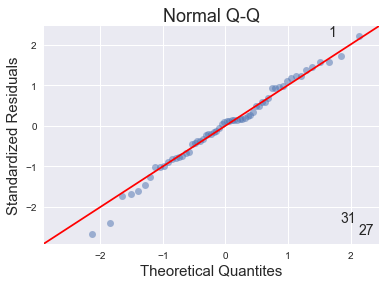

In [29]:
# ### 2. QQ plot by functions
# import scipy.stats as stats
# res_lm1 =results_fm1.resid
# fig = sm.qqplot(res_lm1,stats.t, fit=True, line='45')
# plt.show()

##2. QQ plot  detailed
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line ='45', alpha = 0.5, color ='#4C72B0', lw=1)

plot_lm_2.set_figheight(4)
plot_lm_2.set_figwidth(6)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantites')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

#annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)  #np.argsort: Returns the indices that would sort an array.
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r,i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                              xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                 model_norm_residuals[i]));

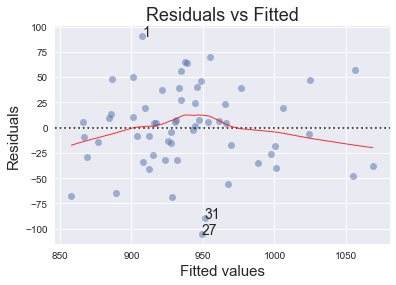

In [28]:
## 1. Residual plots

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(4)
plot_lm_1.set_figwidth(6)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Mort', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

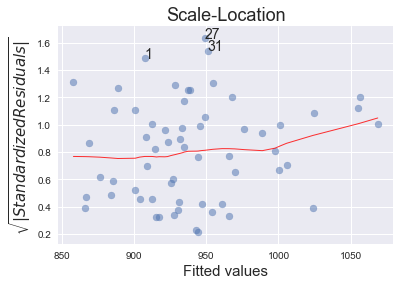

In [30]:
# 3. Scale-Location Plot. 

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(4)
plot_lm_3.set_figwidth(6)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha =0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
           scatter = False,
           ci = False,
           lowess = True,
           line_kws={'color':'red', 'lw':1, 'alpha':0.8})


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

#annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt),0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_sq_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                              xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]))


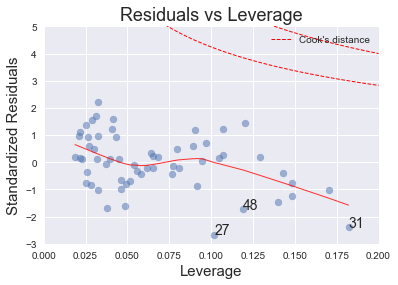

In [32]:
#4. Leverage plot
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(4)
plot_lm_4.set_figwidth(6)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals,              ###Plot data and a linear regression model fit.
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(results_fm1.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

## From the plot, we can remove two outlier obs.
    #28 (lan, i.e., Lancaster, PA)
    #32 (mia, i.e., Miami, FL).
    
    note that Python index from 0, rather than 1.
    
 From notem York (yrk), like Lancaster, PA is heavily 
    populated by memembers of the Amish religion
    so obs, for York, pA (#59) are also removed
 New data deleted three cities #28,32,59


In [52]:
# r_df = df.iloc[0:26; 28:30; 32:57; 59,:]
r_df =df.drop([27, 31, 58])            # remove certain rows (outliers)
r_df                                                    #note that the row's index didn't update

,Prec,Educ,NW,NOX,SO2,Mort
0,36,11.4,8.8,15,59,921.870
1,35,11.0,3.5,10,39,997.875
2,44,9.8,0.8,6,33,962.354
3,47,11.1,27.1,8,24,982.291
4,43,9.6,24.4,38,206,1071.289
5,53,10.2,38.5,32,72,1030.380
6,43,12.1,3.5,32,62,934.700
7,45,10.6,5.3,4,4,899.529
8,36,10.5,8.1,12,37,1001.902
9,36,10.7,6.7,7,20,912.347


# do linear regression to the new data
## Note that all variables are sign.

rfm1 <- lm(Mort ~ Prec + Educ + NW, data = rdata1)
summary(rfm1)

In [56]:
model_fm1 =ols('Mort ~ Prec + Educ + NW', data = r_df)

In [58]:
results_fm1 = model_fm1.fit()
print(results_fm1.summary(0))

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     35.61
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           9.63e-13
Time:                        20:43:03   Log-Likelihood:                -283.63
No. Observations:                  57   AIC:                             575.3
Df Residuals:                      53   BIC:                             583.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1178.9899     94.072     12.533      0.0

## Plot as earlier

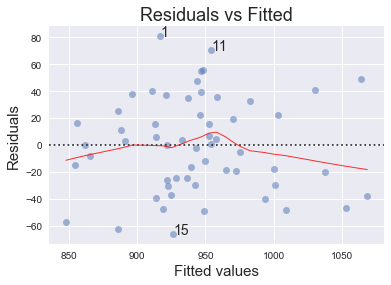

In [64]:
##  Residual plots

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(4)
plot_lm_1.set_figwidth(6)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Mort', data=r_df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

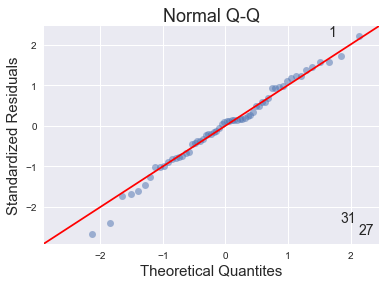

In [60]:
##2. QQ plot  detailed
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line ='45', alpha = 0.5, color ='#4C72B0', lw=1)

plot_lm_2.set_figheight(4)
plot_lm_2.set_figwidth(6)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantites')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

#annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)  #np.argsort: Returns the indices that would sort an array.
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r,i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                              xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                 model_norm_residuals[i]));

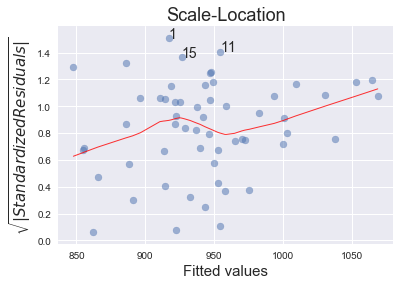

In [63]:
# 3. Scale-Location Plot. 

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(4)
plot_lm_3.set_figwidth(6)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha =0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
           scatter = False,
           ci = False,
           lowess = True,
           line_kws={'color':'red', 'lw':1, 'alpha':0.8})


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

#annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt),0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_sq_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                              xy=(model_fitted_y[i],
                                 model_norm_residuals_abs_sqrt[i]))

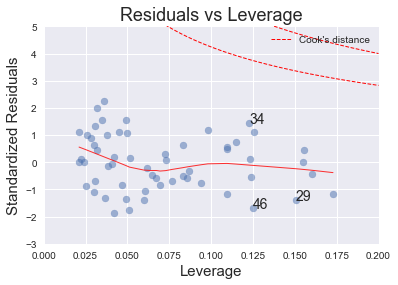

In [65]:
#4. Leverage plot
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(4)
plot_lm_4.set_figwidth(6)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals,              ###Plot data and a linear regression model fit.
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(results_fm1.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

# Add NOX to the data after 3 cities are deleted. #

rfm2 <- lm(Mort ~ Prec + Educ + NW + NOX, data = rdata1)
summary(rfm2)
anova(rfm1,rfm2)

In [68]:
model_fm2 =ols('Mort ~ Prec + Educ + NW+NOX', data = r_df)
results_fm2=model_fm2.fit()
print(results_fm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     27.70
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.43e-12
Time:                        20:51:01   Log-Likelihood:                -282.56
No. Observations:                  57   AIC:                             575.1
Df Residuals:                      52   BIC:                             585.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1154.0828     94.867     12.165      0.0

### ANOVA

In [73]:
# table = sm.stats.anova_lm(results_fm2, typ=2) # Type 2 ANOVA DataFrame
# print(table)

In [75]:
table12 = sm.stats.anova_lm(results_fm1, results_fm2)
print(table12)

   df_resid           ssr  df_diff      ss_diff         F    Pr(>F)
0      53.0  70049.043653      0.0          NaN       NaN       NaN
1      52.0  67470.210196      1.0  2578.833457  1.987534  0.164552


## The large p-value (0.1646) shows that mortality may not be associtaed with NOX once the effects of the climate and socioeconomic variables are accounted for.

# Now only Add SO2 to the model

rfm3 <- lm(Mort ~ Prec + Educ + NW + SO2, data = rdata1)
summary(rfm3)
anova(rfm1,rfm3)


In [76]:
model_fm3 =ols('Mort ~ Prec + Educ + NW+SO2', data = r_df)
results_fm3=model_fm3.fit()
print(results_fm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     39.74
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           3.17e-15
Time:                        20:59:09   Log-Likelihood:                -275.17
No. Observations:                  57   AIC:                             560.3
Df Residuals:                      52   BIC:                             570.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1025.3813     89.546     11.451      0.0

In [77]:
table13 = sm.stats.anova_lm(results_fm1, results_fm3)
print(table13)

   df_resid           ssr  df_diff       ss_diff          F    Pr(>F)
0      53.0  70049.043653      0.0           NaN        NaN       NaN
1      52.0  52068.211800      1.0  17980.831853  17.957276  0.000093



### The small p-value indicates that there is strong evidence that increased SO2 pollution increases mortality (since the coefficient for SO2 is positive). 


# Finally, add both NOX and SO2 to the model

rfm4 <- lm(Mort ~ Prec + Educ + NW + NOX + SO2, data = rdata1)
summary(rfm4)


In [78]:
model_fm4 =ols('Mort ~ Prec + Educ + NW+NOX+SO2', data = r_df)
results_fm4=model_fm4.fit()
print(results_fm4.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     31.19
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           2.14e-14
Time:                        21:01:51   Log-Likelihood:                -275.17
No. Observations:                  57   AIC:                             562.3
Df Residuals:                      51   BIC:                             574.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1025.4881     90.420     11.341      0.0


### The results confirm that while the coefficient for NOX is not significnat, the coefficient for SO2 is significant.
 ### You can also look at the plot of the new regression (the rest part are extremely similar to earlier part so I omit the details)
 
 par(mfrow = c(2,2))
plot(rfm4)

 We may want to remove the observations for New Orleans, LA (no, #37) 
or Los Angeles, CA (la, #29) as well. Thus, Continue to delete #29, #37 of data1 or to delete #28, #35 from rdata1


rdata2 <- rdata1[c(-28,-35),]
rfm5 <- lm(Mort ~ Prec + Educ + NW + NOX + SO2, data = rdata2)
summary(rfm5)

par(mfrow = c(2,2))
plot(rfm5)

### we stll have similar conclusion. Therefore, we conclude that increased SO2 leads to increased mortality, whereas NOX levels do not correlate positively with mortality, after the effects of the climate and socioeconomic variables are accounted for.
